# Moving Averages

In [1]:
import pandas as pd
from pandas import DatetimeIndex
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import math
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
my_year_month_fmt = mdates.DateFormatter('%m/%y')
plt.rcParams['figure.figsize'] = (15, 9)
%matplotlib inline
import pandas_datareader as web
import datetime

In [2]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2020, 1, 1)
amzn_df = web.DataReader('AMZN', 'yahoo', start, end)
amzn = amzn_df.copy()


In [3]:
amzn_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001
2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002
2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005
2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999
2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013


In [4]:
amzn_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2014-01-02 to 2019-12-31
Data columns (total 6 columns):
High         1510 non-null float64
Low          1510 non-null float64
Open         1510 non-null float64
Close        1510 non-null float64
Volume       1510 non-null int64
Adj Close    1510 non-null float64
dtypes: float64(5), int64(1)
memory usage: 82.6 KB


## 20,100 days SMA
The 20-day may be of analytical benefit to a shorter-term trader since it follows the price more closely and therefore produces less "lag" than the longer-term moving average. A 100-day MA may be more beneficial to a longer-term trader.


In [5]:
amzn_df["20d_sma"]=np.round(amzn_df["Close"].rolling(window=20,center=False).mean(),5)
amzn_df["100d_sma"]=np.round(amzn_df["Close"].rolling(window=100,center=False).mean(),5)
amzn_df.fillna(0,inplace=True)
amzn_df.tail(20)

,High,Low,Open,Close,Volume,Adj Close,20d_sma,100d_sma
Date,,,,,,,,
2019-12-03,1772.869995,1747.229980,1760.000000,1769.959961,3380900,1769.959961,1772.06699,1803.2365
2019-12-04,1789.089966,1760.219971,1774.010010,1760.689941,2670100,1760.689941,1770.01599,1800.6335
2019-12-05,1763.500000,1740.000000,1763.500000,1740.479980,2823800,1740.479980,1767.25149,1797.9393
2019-12-06,1754.400024,1740.130005,1751.199951,1751.599976,3117400,1751.599976,1765.42149,1795.5350
2019-12-09,1766.890015,1745.609985,1750.660034,1749.510010,2442800,1749.510010,1763.60299,1793.2511
2019-12-10,1750.670044,1735.000000,1747.400024,1739.209961,2514300,1739.209961,1761.98099,1790.9980
2019-12-11,1750.000000,1735.709961,1741.670044,1748.719971,2097600,1748.719971,1760.51699,1788.6289
2019-12-12,1764.000000,1745.439941,1750.000000,1760.329956,3095900,1760.329956,1760.87798,1786.2873
2019-12-13,1768.989990,1755.000000,1765.000000,1760.939941,2745700,1760.939941,1761.19498,1783.8886


/Users/cuijingyi/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Price in $')

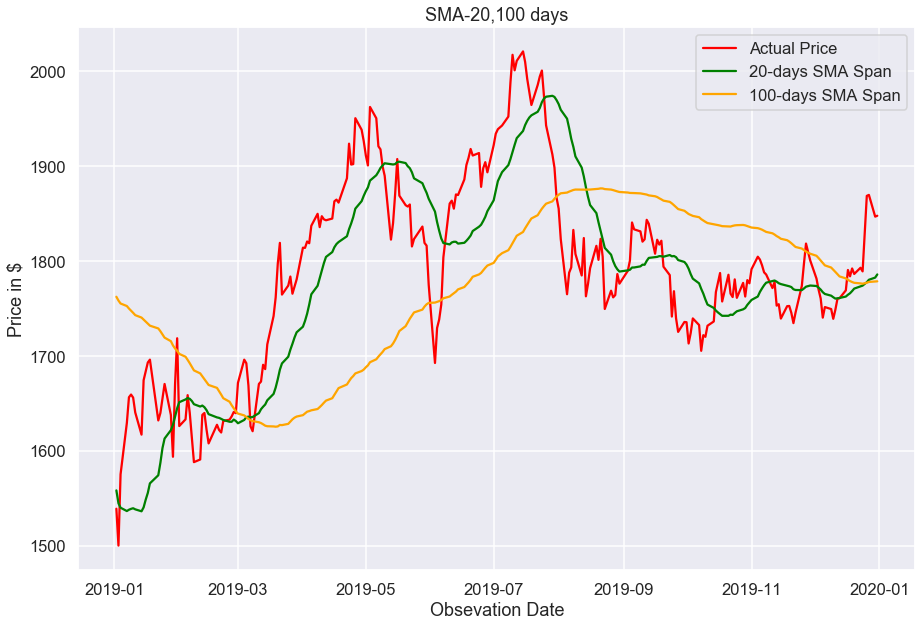

In [6]:
start_date = '2019-01-01'
end_date = '2020-01-01'

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(amzn_df.loc[start_date:end_date, :].index, amzn_df.loc[start_date:end_date, 'Close'], label='Actual Price', color = 'red')
ax.plot(amzn_df.loc[start_date:end_date, :].index, amzn_df.loc[start_date:end_date, '20d_sma'], label = '20-days SMA Span', color = 'green')
ax.plot(amzn_df.loc[start_date:end_date, :].index, amzn_df.loc[start_date:end_date, '100d_sma'], label = '100-days SMA Span', color = 'orange')

ax.legend(loc='best')
ax.set_title('SMA-20,100 days')
ax.set_xlabel('Obsevation Date')
ax.set_ylabel('Price in $')

## 20, 100 days EMA

Text(0, 0.5, 'Price in $')

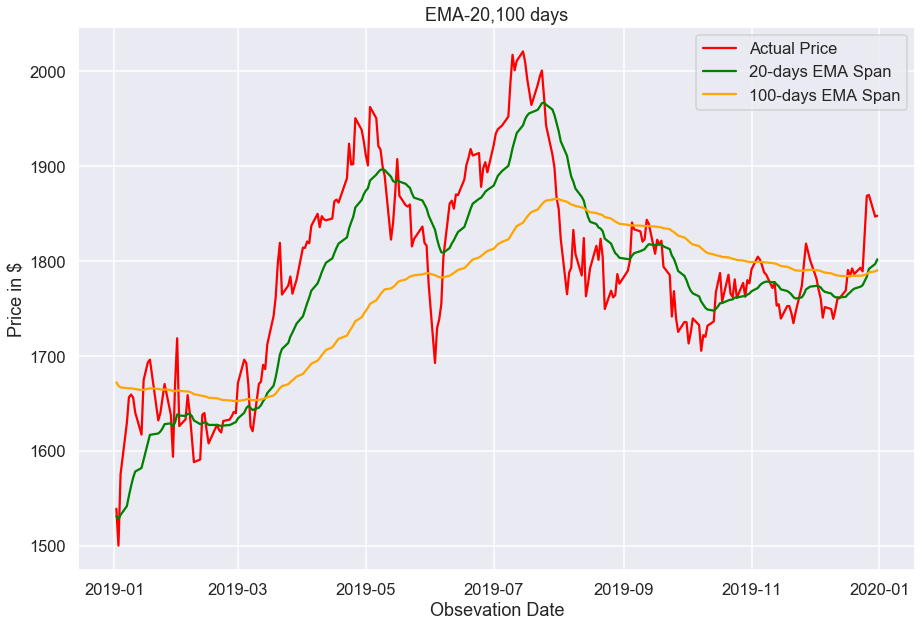

In [7]:
ema_20= amzn.ewm(span=20, adjust=False).mean()
ema_100 = amzn.ewm(span=100, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(amzn.loc[start_date:end_date, :].index, amzn.loc[start_date:end_date, 'Close'], label='Actual Price', color = 'red')
ax.plot(ema_20.loc[start_date:end_date, :].index, ema_20.loc[start_date:end_date, 'Close'], label = '20-days EMA Span', color = 'green')
ax.plot(ema_100.loc[start_date:end_date, :].index, ema_100.loc[start_date:end_date, 'Close'], label = '100-days EMA Span', color = 'orange')

ax.legend(loc='best')
ax.set_title('EMA-20,100 days')
ax.set_xlabel('Obsevation Date')
ax.set_ylabel('Price in $')

## 10,20,30 days EMA

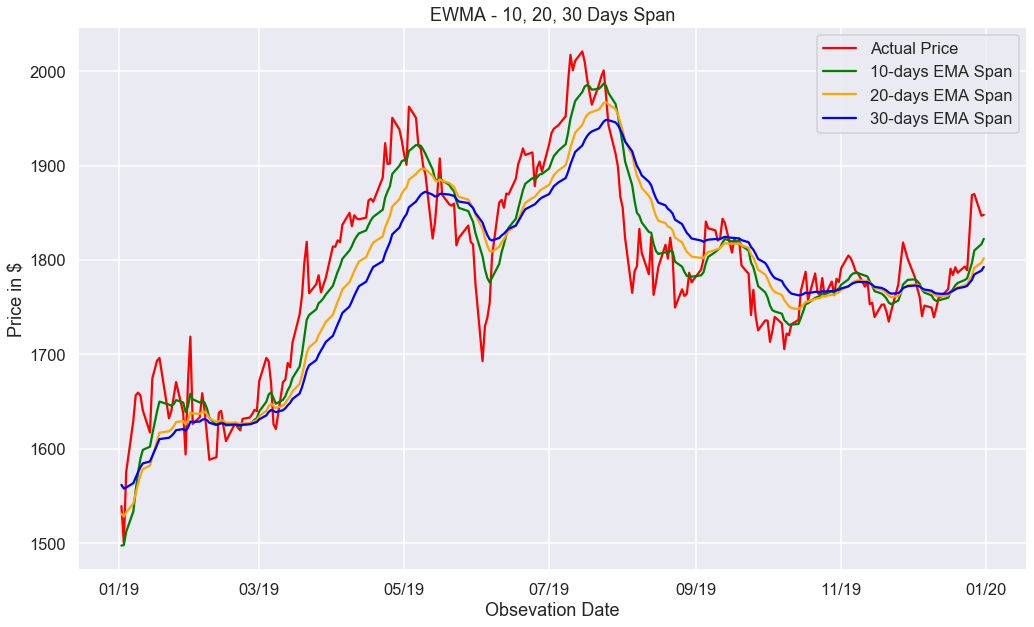

In [8]:
ema_10 = amzn.ewm(span=10, adjust=False).mean()
ema_30 = amzn.ewm(span=30, adjust=False).mean()

fig, ax = plt.subplots(figsize=(17,10))

ax.plot(amzn.loc[start_date:end_date, :].index, amzn.loc[start_date:end_date, 'Close'], label='Actual Price', color = 'red')
ax.plot(ema_10.loc[start_date:end_date, :].index, ema_10.loc[start_date:end_date, 'Close'], label = '10-days EMA Span', color = 'green')
ax.plot(ema_20.loc[start_date:end_date, :].index, ema_20.loc[start_date:end_date, 'Close'], label = '20-days EMA Span', color = 'orange')
ax.plot(ema_30.loc[start_date:end_date, :].index, ema_30.loc[start_date:end_date, 'Close'], label = '30-days EMA Span', color = 'blue')

ax.legend(loc='best')
ax.set_title('EWMA - 10, 20, 30 Days Span')
ax.set_xlabel('Obsevation Date')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

## 20days SMA V.S. 20days EMA

Text(0, 0.5, 'Price in $')

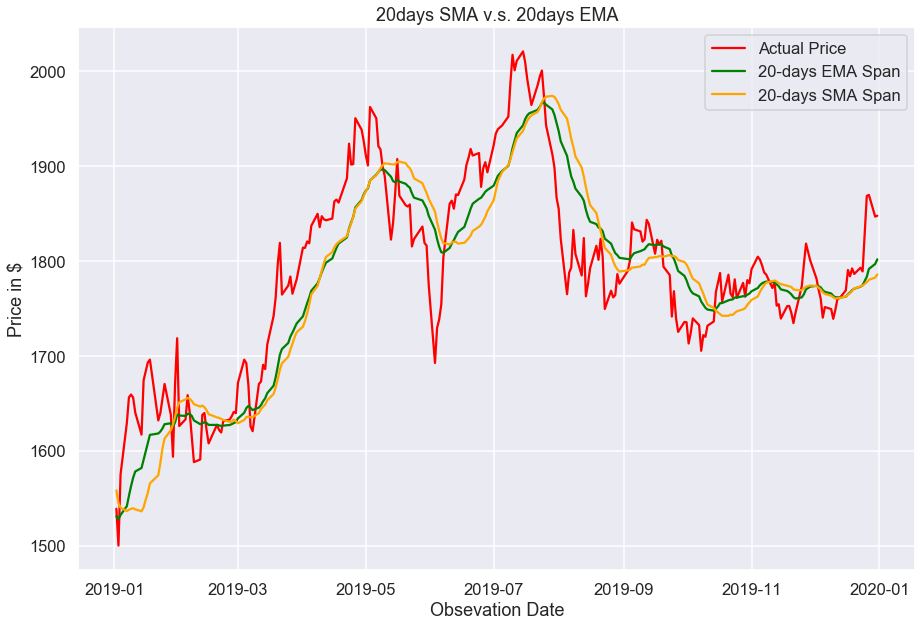

In [9]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(amzn.loc[start_date:end_date, :].index, amzn.loc[start_date:end_date, 'Close'], label='Actual Price', color = 'red')
ax.plot(ema_20.loc[start_date:end_date, :].index, ema_20.loc[start_date:end_date, 'Close'], label = '20-days EMA Span', color = 'green')
ax.plot(amzn_df.loc[start_date:end_date, :].index, amzn_df.loc[start_date:end_date, '20d_sma'], label = '20-days SMA Span', color = 'orange')

ax.legend(loc='best')
ax.set_title('20days SMA v.s. 20days EMA')
ax.set_xlabel('Obsevation Date')
ax.set_ylabel('Price in $')

### Moving Average Trading Strategy For Short Term:
EMA can reduce the lag induced by the use of the SMA and 20days EMA is closer to Actual Price than 20day SMA. So we will use 20days EMA to make trading stategy for short term investors.

In [11]:
amzn_new=pd.DataFrame()
amzn_new['Actual Close'] = amzn['Close']
amzn_new['20days EMA Close'] = ema_20['Close']
amzn_new.tail(20)

,Actual Close,20days EMA Close
Date,,
2019-12-03,1769.959961,1773.585217
2019-12-04,1760.689941,1772.357096
2019-12-05,1740.479980,1769.321180
2019-12-06,1751.599976,1767.633446
2019-12-09,1749.510010,1765.907405
2019-12-10,1739.209961,1763.364791
2019-12-11,1748.719971,1761.970046
2019-12-12,1760.329956,1761.813847
2019-12-13,1760.939941,1761.730618


In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(amzn_new['Actual Close'], amzn_new['20days EMA Close']))
rmse

39.552403180992876

Buy if actual actual close price cross 20days EMA from below <br>
Sell if actual close price cross 20 days EMA from above

In [13]:

for index, row in amzn_new.iterrows():
    if amzn_new.loc[index,'Actual Close'] > amzn_new.loc[index,'20days EMA Close']:
        amzn_new.loc[index,'Signal'] = 1   
    elif amzn_new.loc[index,'Actual Close'] < amzn_new.loc[index,'20days EMA Close']:
        amzn_new.loc[index,'Signal'] = -1   
    else:
        amzn_new.loc[index,'Signal'] = 0


In [14]:
amzn_new.dropna(axis=0,how='any',inplace=True)
amzn_new.head()

,Actual Close,20days EMA Close,Signal
Date,,,
2014-01-02,397.970001,397.970001,0.0
2014-01-03,396.440002,397.824287,-1.0
2014-01-06,393.630005,397.424832,-1.0
2014-01-07,398.029999,397.482467,1.0
2014-01-08,401.920013,397.905090,1.0


In [15]:
amzn_new['Signal']= amzn_new['Signal'].shift(1)
amzn_new.head(20)

,Actual Close,20days EMA Close,Signal
Date,,,
2014-01-02,397.970001,397.970001,NaN
2014-01-03,396.440002,397.824287,0.0
2014-01-06,393.630005,397.424832,-1.0
2014-01-07,398.029999,397.482467,-1.0
2014-01-08,401.920013,397.905090,1.0
2014-01-09,401.010010,398.200797,1.0
2014-01-10,397.660004,398.149293,1.0
2014-01-13,390.980011,397.466504,-1.0
2014-01-14,397.540009,397.473504,-1.0


In [16]:
# initial price 397.97
# last price 1846.09
initial_amt = 100000
total_shares = 30
print('Account balance ',initial_amt)
print('Initial number of shares owned ',total_shares)
avg_price = 397.97
initial_val = 111939.1 #initial amount+total_shares*ini_price

for index, row in amzn_new.iterrows():
    if amzn_new.loc[index,'Signal'] == 1:
        if (initial_amt - amzn_new.loc[index,'Actual Close'])> 0 :
            initial_amt -= amzn_new.loc[index,'Actual Close']
            avg_price = ((avg_price*total_shares)+amzn_new.loc[index,'Actual Close'])/(total_shares+1)
            total_shares = total_shares + 1;
            amzn_new.loc[index,'Action'] = "Buy"
        else:
            amzn_new.loc[index,'Action'] = "Buy Alert"         
    elif amzn_new.loc[index,'Signal'] == -1:
        if total_shares - 1 > 0 :
            amzn_new.loc[index,'Action'] = "Sell"
            avg_price = ((avg_price*total_shares)-amzn_new.loc[index,'Actual Close'])/(total_shares-1)
            initial_amt += amzn_new.loc[index,'Actual Close'];
            total_shares = total_shares - 1;
        else:
            amzn_new.loc[index,'Action'] = "Sell Alert"
    else:
        amzn_new.loc[index,'Action'] = "Hold"

print('----------------Signals Given During Day To Day Trade------------------------')

total_val = initial_amt + total_shares * 2034.33  
print(amzn_new.tail(20))

print('----------------Results-------------------------')
print('Balance left in Account',initial_amt)
print('Total Number of shares ',total_shares)
print('Total value of the shares ',total_val)
print('Percentage Profit ',((total_val-initial_val)/initial_val)*100)

Account balance  100000
Initial number of shares owned  30
----------------Signals Given During Day To Day Trade------------------------
            Actual Close  20days EMA Close  Signal Action
Date                                                     
2019-12-03   1769.959961       1773.585217     1.0    Buy
2019-12-04   1760.689941       1772.357096    -1.0   Sell
2019-12-05   1740.479980       1769.321180    -1.0   Sell
2019-12-06   1751.599976       1767.633446    -1.0   Sell
2019-12-09   1749.510010       1765.907405    -1.0   Sell
2019-12-10   1739.209961       1763.364791    -1.0   Sell
2019-12-11   1748.719971       1761.970046    -1.0   Sell
2019-12-12   1760.329956       1761.813847    -1.0   Sell
2019-12-13   1760.939941       1761.730618    -1.0   Sell
2019-12-16   1769.209961       1762.442936    -1.0   Sell
2019-12-17   1790.660034       1765.130279     1.0    Buy
2019-12-18   1784.030029       1766.930255     1.0    Buy
2019-12-19   1792.280029       1769.344519     1.0 

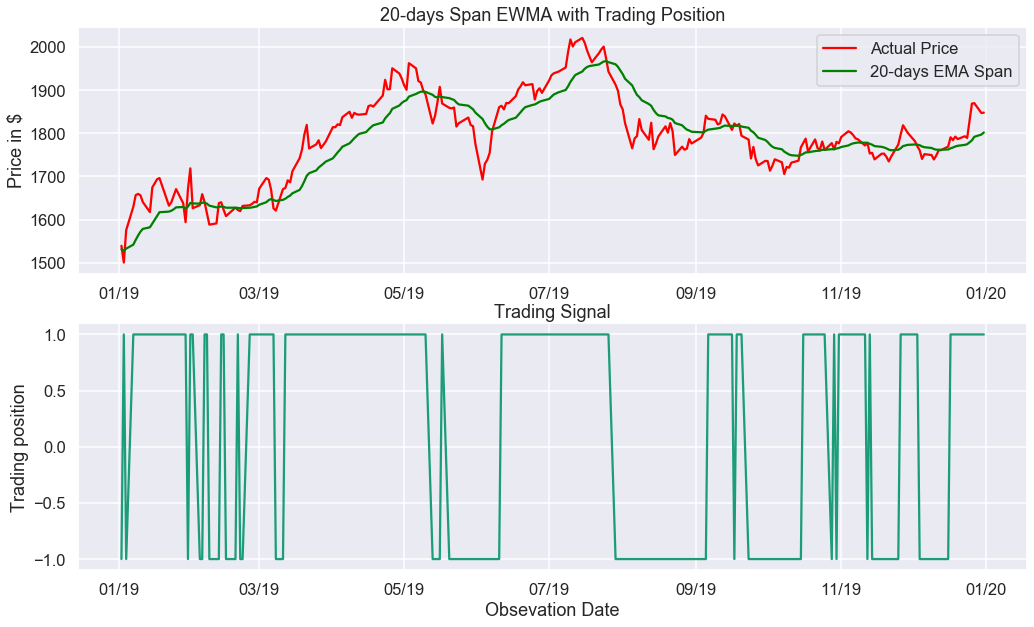

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(17,10))

ax1.plot(amzn_new.loc[start_date:end_date, :].index, amzn_new.loc[start_date:end_date, 'Actual Close'], label='Actual Price', color = 'red')
ax1.plot(amzn_new.loc[start_date:end_date, :].index, amzn_new.loc[start_date:end_date, '20days EMA Close'], label = '20-days EMA Span', color = 'green')

ax1.set_title('20-days Span EWMA with Trading Position')
ax1.set_ylabel('Price in $')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(amzn_new.loc[start_date:end_date, :].index, amzn_new.loc[start_date:end_date, 'Signal'], 
        label='Trading position')
ax2.set_title('Trading Signal')
ax2.set_xlabel('Obsevation Date')
ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

## New Trading Strategy （used for back testing）

In [19]:
amount = 10000
Amount = []
balance = 0
action = []
portfolio = 0
Portfolio = []
stocks = 0
Stocks = []


for i in range(len(amzn_new)):
    if amzn_new['Signal'][i] == 1:
        if (amount - amzn_new['Actual Close'][i])> 0 :
            action.append('Buy')
            stocks = int(amount / amzn_new['Actual Close'][i])
            balance = int(amount % amzn_new['Actual Close'][i])
            portfolio = stocks * amzn_new['Actual Close'][i]
            signal = 1
            amount = portfolio + balance
            print('Stock:',amzn_new['Actual Close'][i] ,'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Buy Alert')
            portfolio = stocks * amzn_new['Actual Close'][i]
            amount = portfolio + balance
            print('Stock:',amzn_new['Actual Close'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
    elif amzn_new['Signal'][i] == -1:
        if stocks - 1 > 0 :
            action.append('Sell')
            portfolio = stocks * amzn_new['Actual Close'][i]
            
            signal = 0
            stocks = 0
            amount = balance + portfolio
            portfolio = 0
            balance = 0
            print('Stock:',amzn_new['Actual Close'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Sell Alert')
            print('Stock:',amzn_new['Actual Close'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
    else:
        action.append('Hold')
        print('Stock:',amzn_new['Actual Close'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
        Portfolio.append(round(portfolio,5))
        Amount.append(round(amount,0))
        Stocks.append(stocks)
    print('\n')
 
    

Stock: 397.9700012207031 Action: Hold Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000


Stock: 396.44000244140625 Action: Hold Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000


Stock: 393.6300048828125 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000


Stock: 398.0299987792969 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000


Stock: 401.9200134277344 Action: Buy Portfolio: 9646.08 Stocks: 24 Balance_init: 353 total($) 9999.08


Stock: 401.010009765625 Action: Buy Portfolio: 9624.24 Stocks: 24 Balance_init: 374 total($) 9998.24


Stock: 397.6600036621094 Action: Buy Portfolio: 9941.5 Stocks: 25 Balance_init: 56 total($) 9997.5


Stock: 390.9800109863281 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 9830.5


Stock: 397.5400085449219 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 9830.5


Stock: 395.8699951171875 Action: Buy Portfolio: 9500.88 Stocks: 24 Balance_init: 329 total($) 9829.88


Sto

Stock: 295.19000244140625 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 9129.4


Stock: 297.70001220703125 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 9129.4


Stock: 296.760009765625 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 9129.4


Stock: 301.19000244140625 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 9129.4


Stock: 305.010009765625 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 9129.4


Stock: 304.9100036621094 Action: Buy Portfolio: 8842.39 Stocks: 29 Balance_init: 287 total($) 9129.39


Stock: 312.239990234375 Action: Buy Portfolio: 9054.96 Stocks: 29 Balance_init: 74 total($) 9128.96


Stock: 310.82000732421875 Action: Buy Portfolio: 9013.78 Stocks: 29 Balance_init: 115 total($) 9128.78


Stock: 310.1600036621094 Action: Buy Portfolio: 8994.64 Stocks: 29 Balance_init: 134 total($) 9128.64


Stock: 313.7799987792969 Action: Buy Portfolio: 9099.62 Stocks: 29 Balance_init

Stock: 323.8900146484375 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 9202.91


Stock: 327.760009765625 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 9202.91


Stock: 324.0 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 9202.91


Stock: 325.0 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 9202.91


Stock: 331.32000732421875 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 9202.91


Stock: 324.5 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 9202.91


Stock: 323.6300048828125 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 9202.91


Stock: 328.2099914550781 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 9202.91


Stock: 321.92999267578125 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 9202.91


Stock: 323.2099914550781 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 9202.91


Stock: 321.8200

Stock: 354.5299987792969 Action: Buy Portfolio: 8863.25 Stocks: 25 Balance_init: 160 total($) 9023.25


Stock: 364.4700012207031 Action: Buy Portfolio: 8747.28 Stocks: 24 Balance_init: 275 total($) 9022.28


Stock: 363.54998779296875 Action: Buy Portfolio: 8725.2 Stocks: 24 Balance_init: 297 total($) 9022.2


Stock: 364.75 Action: Buy Portfolio: 8754.0 Stocks: 24 Balance_init: 268 total($) 9022.0


Stock: 373.8900146484375 Action: Buy Portfolio: 8973.36 Stocks: 24 Balance_init: 48 total($) 9021.36


Stock: 374.2799987792969 Action: Buy Portfolio: 8982.72 Stocks: 24 Balance_init: 38 total($) 9020.72


Stock: 370.55999755859375 Action: Buy Portfolio: 8893.44 Stocks: 24 Balance_init: 127 total($) 9020.44


Stock: 373.0 Action: Buy Portfolio: 8952.0 Stocks: 24 Balance_init: 68 total($) 9020.0


Stock: 375.1400146484375 Action: Buy Portfolio: 9003.36 Stocks: 24 Balance_init: 16 total($) 9019.36


Stock: 377.1700134277344 Action: Buy Portfolio: 8674.91 Stocks: 23 Balance_init: 344 total($) 9

Stock: 427.80999755859375 Action: Buy Portfolio: 9411.82 Stocks: 22 Balance_init: 93 total($) 9504.82


Stock: 439.3900146484375 Action: Buy Portfolio: 9227.19 Stocks: 21 Balance_init: 277 total($) 9504.19


Stock: 434.9200134277344 Action: Buy Portfolio: 9133.32 Stocks: 21 Balance_init: 370 total($) 9503.32


Stock: 436.2900085449219 Action: Buy Portfolio: 9162.09 Stocks: 21 Balance_init: 341 total($) 9503.09


Stock: 445.989990234375 Action: Buy Portfolio: 9365.79 Stocks: 21 Balance_init: 137 total($) 9502.79


Stock: 440.8399963378906 Action: Buy Portfolio: 9257.64 Stocks: 21 Balance_init: 245 total($) 9502.64


Stock: 440.1000061035156 Action: Buy Portfolio: 9242.1 Stocks: 21 Balance_init: 260 total($) 9502.1


Stock: 438.1000061035156 Action: Buy Portfolio: 9200.1 Stocks: 21 Balance_init: 302 total($) 9502.1


Stock: 429.8599853515625 Action: Buy Portfolio: 9456.92 Stocks: 22 Balance_init: 45 total($) 9501.92


Stock: 434.0899963378906 Action: Sell Portfolio: 0 Stocks: 0 Balance_i

Stock: 642.3499755859375 Action: Buy Portfolio: 8992.9 Stocks: 14 Balance_init: 64 total($) 9056.9


Stock: 647.8099975585938 Action: Buy Portfolio: 8421.53 Stocks: 13 Balance_init: 635 total($) 9056.53


Stock: 643.2999877929688 Action: Buy Portfolio: 9006.2 Stocks: 14 Balance_init: 50 total($) 9056.2


Stock: 663.5399780273438 Action: Buy Portfolio: 8626.02 Stocks: 13 Balance_init: 430 total($) 9056.02


Stock: 661.27001953125 Action: Buy Portfolio: 8596.51 Stocks: 13 Balance_init: 459 total($) 9055.51


Stock: 668.4500122070312 Action: Buy Portfolio: 8689.85 Stocks: 13 Balance_init: 365 total($) 9054.85


Stock: 678.989990234375 Action: Buy Portfolio: 8826.87 Stocks: 13 Balance_init: 227 total($) 9053.87


Stock: 671.1500244140625 Action: Buy Portfolio: 8724.95 Stocks: 13 Balance_init: 328 total($) 9052.95


Stock: 675.3400268554688 Action: Buy Portfolio: 8779.42 Stocks: 13 Balance_init: 273 total($) 9052.42


Stock: 673.260009765625 Action: Buy Portfolio: 8752.38 Stocks: 13 Balance

Stock: 603.1699829101562 Action: Buy Portfolio: 8444.38 Stocks: 14 Balance_init: 486 total($) 8930.38


Stock: 614.8200073242188 Action: Buy Portfolio: 8607.48 Stocks: 14 Balance_init: 322 total($) 8929.48


Stock: 620.75 Action: Buy Portfolio: 8690.5 Stocks: 14 Balance_init: 238 total($) 8928.5


Stock: 625.8900146484375 Action: Buy Portfolio: 8762.46 Stocks: 14 Balance_init: 166 total($) 8928.46


Stock: 635.3499755859375 Action: Buy Portfolio: 8894.9 Stocks: 14 Balance_init: 33 total($) 8927.9


Stock: 627.9000244140625 Action: Buy Portfolio: 8790.6 Stocks: 14 Balance_init: 137 total($) 8927.6


Stock: 632.989990234375 Action: Buy Portfolio: 8861.86 Stocks: 14 Balance_init: 65 total($) 8926.86


Stock: 631.0 Action: Buy Portfolio: 8834.0 Stocks: 14 Balance_init: 92 total($) 8926.0


Stock: 620.5 Action: Buy Portfolio: 8687.0 Stocks: 14 Balance_init: 239 total($) 8926.0


Stock: 626.2000122070312 Action: Buy Portfolio: 8766.8 Stocks: 14 Balance_init: 159 total($) 8925.8


Stock: 616.

Stock: 768.5599975585938 Action: Buy Portfolio: 8454.16 Stocks: 11 Balance_init: 514 total($) 8968.16


Stock: 771.239990234375 Action: Buy Portfolio: 8483.64 Stocks: 11 Balance_init: 484 total($) 8967.64


Stock: 772.5599975585938 Action: Buy Portfolio: 8498.16 Stocks: 11 Balance_init: 469 total($) 8967.16


Stock: 768.489990234375 Action: Buy Portfolio: 8453.39 Stocks: 11 Balance_init: 513 total($) 8966.39


Stock: 764.0399780273438 Action: Buy Portfolio: 8404.44 Stocks: 11 Balance_init: 561 total($) 8965.44


Stock: 764.6300048828125 Action: Buy Portfolio: 8410.93 Stocks: 11 Balance_init: 554 total($) 8964.93


Stock: 764.4600219726562 Action: Buy Portfolio: 8409.06 Stocks: 11 Balance_init: 555 total($) 8964.06


Stock: 757.3099975585938 Action: Buy Portfolio: 8330.41 Stocks: 11 Balance_init: 633 total($) 8963.41


Stock: 759.47998046875 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8987.28


Stock: 762.4500122070312 Action: Buy Portfolio: 8386.95 Stocks: 11 Balance_i


Stock: 765.1500244140625 Action: Buy Portfolio: 8416.65 Stocks: 11 Balance_init: 477 total($) 8893.65


Stock: 749.8699951171875 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8725.57


Stock: 753.6699829101562 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8725.57


Stock: 757.1799926757812 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8725.57


Stock: 780.4500122070312 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8725.57


Stock: 795.989990234375 Action: Buy Portfolio: 7959.9 Stocks: 10 Balance_init: 765 total($) 8724.9


Stock: 796.9199829101562 Action: Buy Portfolio: 7969.2 Stocks: 10 Balance_init: 755 total($) 8724.2


Stock: 795.9000244140625 Action: Buy Portfolio: 7959.0 Stocks: 10 Balance_init: 765 total($) 8724.0


Stock: 799.02001953125 Action: Buy Portfolio: 7990.2 Stocks: 10 Balance_init: 733 total($) 8723.2


Stock: 813.6400146484375 Action: Buy Portfolio: 8136.4 Stocks: 10 Balance_init: 586 tota

Stock: 996.7000122070312 Action: Buy Portfolio: 7973.6 Stocks: 8 Balance_init: 730 total($) 8703.6


Stock: 994.6199951171875 Action: Buy Portfolio: 7956.96 Stocks: 8 Balance_init: 746 total($) 8702.96


Stock: 995.9500122070312 Action: Buy Portfolio: 7967.6 Stocks: 8 Balance_init: 735 total($) 8702.6


Stock: 1006.72998046875 Action: Buy Portfolio: 8053.84 Stocks: 8 Balance_init: 648 total($) 8701.84


Stock: 1011.3400268554688 Action: Buy Portfolio: 8090.72 Stocks: 8 Balance_init: 611 total($) 8701.72


Stock: 1003.0 Action: Buy Portfolio: 8024.0 Stocks: 8 Balance_init: 677 total($) 8701.0


Stock: 1010.0700073242188 Action: Buy Portfolio: 8080.56 Stocks: 8 Balance_init: 620 total($) 8700.56


Stock: 1010.27001953125 Action: Buy Portfolio: 8082.16 Stocks: 8 Balance_init: 618 total($) 8700.16


Stock: 978.3099975585938 Action: Buy Portfolio: 7826.48 Stocks: 8 Balance_init: 873 total($) 8699.48


Stock: 964.9099731445312 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8592

Stock: 1103.6800537109375 Action: Buy Portfolio: 7725.76 Stocks: 7 Balance_init: 915 total($) 8640.76


Stock: 1094.219970703125 Action: Buy Portfolio: 7659.54 Stocks: 7 Balance_init: 981 total($) 8640.54


Stock: 1111.5999755859375 Action: Buy Portfolio: 7781.2 Stocks: 7 Balance_init: 859 total($) 8640.2


Stock: 1120.6600341796875 Action: Buy Portfolio: 7844.62 Stocks: 7 Balance_init: 795 total($) 8639.62


Stock: 1123.1700439453125 Action: Buy Portfolio: 7862.19 Stocks: 7 Balance_init: 777 total($) 8639.19


Stock: 1132.8800048828125 Action: Buy Portfolio: 7930.16 Stocks: 7 Balance_init: 709 total($) 8639.16


Stock: 1129.1300048828125 Action: Buy Portfolio: 7903.91 Stocks: 7 Balance_init: 735 total($) 8638.91


Stock: 1125.3499755859375 Action: Buy Portfolio: 7877.45 Stocks: 7 Balance_init: 761 total($) 8638.45


Stock: 1129.1700439453125 Action: Buy Portfolio: 7904.19 Stocks: 7 Balance_init: 734 total($) 8638.19


Stock: 1136.8399658203125 Action: Buy Portfolio: 7957.88 Stocks: 7 

Stock: 1410.5699462890625 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8557.1


Stock: 1451.75 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8557.1


Stock: 1405.22998046875 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8557.1


Stock: 1406.0799560546875 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8557.1


Stock: 1436.219970703125 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8557.1


Stock: 1427.050048828125 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8557.1


Stock: 1448.5 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8557.1


Stock: 1430.7900390625 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8557.1


Stock: 1441.5 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8557.1


Stock: 1503.8299560546875 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8557.1


Stock: 1527.8399658203

Stock: 1862.47998046875 Action: Buy Portfolio: 7449.92 Stocks: 4 Balance_init: 1410 total($) 8859.92


Stock: 1886.52001953125 Action: Buy Portfolio: 7546.08 Stocks: 4 Balance_init: 1313 total($) 8859.08


Stock: 1898.52001953125 Action: Buy Portfolio: 7594.08 Stocks: 4 Balance_init: 1265 total($) 8859.08


Stock: 1886.300048828125 Action: Buy Portfolio: 7545.2 Stocks: 4 Balance_init: 1313 total($) 8858.2


Stock: 1896.199951171875 Action: Buy Portfolio: 7584.8 Stocks: 4 Balance_init: 1273 total($) 8857.8


Stock: 1919.6500244140625 Action: Buy Portfolio: 7678.6 Stocks: 4 Balance_init: 1179 total($) 8857.6


Stock: 1882.6199951171875 Action: Buy Portfolio: 7530.48 Stocks: 4 Balance_init: 1327 total($) 8857.48


Stock: 1886.52001953125 Action: Buy Portfolio: 7546.08 Stocks: 4 Balance_init: 1311 total($) 8857.08


Stock: 1882.219970703125 Action: Buy Portfolio: 7528.88 Stocks: 4 Balance_init: 1328 total($) 8856.88


Stock: 1876.7099609375 Action: Buy Portfolio: 7506.84 Stocks: 4 Balance_

Stock: 1501.969970703125 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8126.55


Stock: 1539.1300048828125 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8126.55


Stock: 1500.280029296875 Action: Buy Portfolio: 7501.4 Stocks: 5 Balance_init: 625 total($) 8126.4


Stock: 1575.3900146484375 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8501.95


Stock: 1629.510009765625 Action: Buy Portfolio: 8147.55 Stocks: 5 Balance_init: 354 total($) 8501.55


Stock: 1656.5799560546875 Action: Buy Portfolio: 8282.9 Stocks: 5 Balance_init: 218 total($) 8500.9


Stock: 1659.4200439453125 Action: Buy Portfolio: 8297.1 Stocks: 5 Balance_init: 203 total($) 8500.1


Stock: 1656.219970703125 Action: Buy Portfolio: 8281.1 Stocks: 5 Balance_init: 219 total($) 8500.1


Stock: 1640.56005859375 Action: Buy Portfolio: 8202.8 Stocks: 5 Balance_init: 297 total($) 8499.8


Stock: 1617.2099609375 Action: Buy Portfolio: 8086.05 Stocks: 5 Balance_init: 413 total($

Stock: 1729.56005859375 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8334.88


Stock: 1738.5 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8334.88


Stock: 1754.3599853515625 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8334.88


Stock: 1804.030029296875 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8334.88


Stock: 1860.6300048828125 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8334.88


Stock: 1863.699951171875 Action: Buy Portfolio: 7454.8 Stocks: 4 Balance_init: 880 total($) 8334.8


Stock: 1855.3199462890625 Action: Buy Portfolio: 7421.28 Stocks: 4 Balance_init: 913 total($) 8334.28


Stock: 1870.300048828125 Action: Buy Portfolio: 7481.2 Stocks: 4 Balance_init: 853 total($) 8334.2


Stock: 1869.6700439453125 Action: Buy Portfolio: 7478.68 Stocks: 4 Balance_init: 855 total($) 8333.68


Stock: 1886.030029296875 Action: Buy Portfolio: 7544.12 Stocks: 4 Balance_init: 789 total(

Stock: 1795.77001953125 Action: Buy Portfolio: 7183.08 Stocks: 4 Balance_init: 1157 total($) 8340.08


Stock: 1788.199951171875 Action: Buy Portfolio: 7152.8 Stocks: 4 Balance_init: 1187 total($) 8339.8


Stock: 1785.8800048828125 Action: Buy Portfolio: 7143.52 Stocks: 4 Balance_init: 1196 total($) 8339.52


Stock: 1771.6500244140625 Action: Buy Portfolio: 7086.6 Stocks: 4 Balance_init: 1252 total($) 8338.6


Stock: 1778.0 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8364.0


Stock: 1753.1099853515625 Action: Buy Portfolio: 7012.44 Stocks: 4 Balance_init: 1351 total($) 8363.44


Stock: 1754.5999755859375 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8369.4


Stock: 1739.489990234375 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8369.4


Stock: 1752.530029296875 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8369.4


Stock: 1752.7900390625 Action: Sell Alert Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 8369.4


S

In [20]:
Strategy_Result = pd.DataFrame({'Actual_Close_Price':amzn_new['Actual Close'],
                                 '20_days_EMA':amzn_new['20days EMA Close'],
                                 'Action':  action,
                                 'Stocks': Stocks,
                                 'Portfolio($)': Portfolio,
                                 'Amount($)':Amount
                                    })

Strategy_Result.head()

,Actual_Close_Price,20_days_EMA,Action,Stocks,Portfolio($),Amount($)
Date,,,,,,
2014-01-02,397.970001,397.970001,Hold,0,0.00000,10000.0
2014-01-03,396.440002,397.824287,Hold,0,0.00000,10000.0
2014-01-06,393.630005,397.424832,Sell Alert,0,0.00000,10000.0
2014-01-07,398.029999,397.482467,Sell Alert,0,0.00000,10000.0
2014-01-08,401.920013,397.905090,Buy,24,9646.08032,9999.0


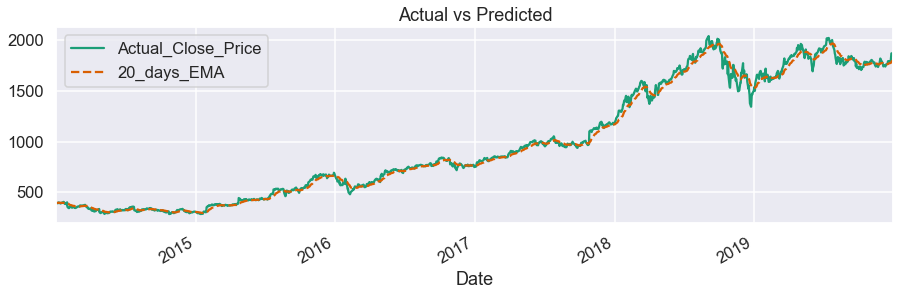

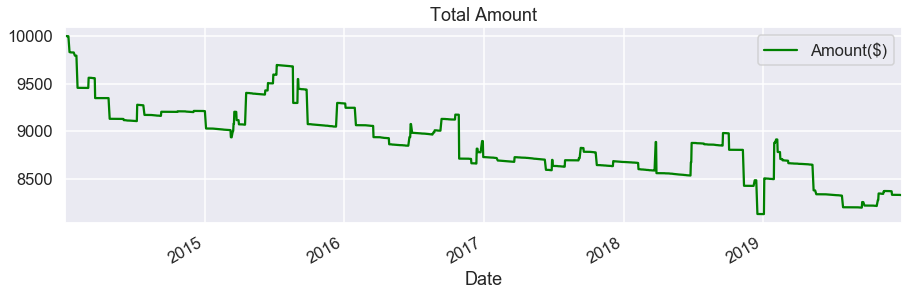

In [21]:
Strategy_Result[['Actual_Close_Price','20_days_EMA']].plot(figsize=(15,4), style=['-','--'], title = 'Actual vs Predicted')


Strategy_Result[['Amount($)']].plot(figsize=(15,4), 
                                            style=['-g'], 
                                            title = 'Total Amount')

In [22]:
Profit = (Amount[-1])/10000
print('Initial_Investment : 10000$')
print('Final Amount:',Amount[-1],'$')      
print ('Profit_Percent:',Profit*100,'%')

Initial_Investment : 10000$
Final Amount: 8325.0 $
Profit_Percent: 83.25 %


In [23]:
Strategy_Result['Returns'] = Strategy_Result['Amount($)'].pct_change()

In [24]:
mean_returns = Strategy_Result['Returns'].mean()
sd = Strategy_Result['Returns'].std()
print(mean_returns,sd)
Market_RF = 0.0464


Sharpe_Ratio = np.sqrt(877)*(mean_returns)/sd
Sharpe_Ratio


-0.00011159283582086023 0.00443600282538441


-0.7449794562601089

## Portfolio Return Trading Strategy

In [25]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2020, 1, 1)
IBM = web.DataReader('ibm', 'yahoo', start, end)
TSLA= web.DataReader('tsla', 'yahoo', start, end)
PG=web.DataReader('pg', 'yahoo', start, end)
NFLX=web.DataReader('nflx', 'yahoo', start, end)

In [26]:
combine=pd.DataFrame()
combine['Amzn_Close']=amzn['Close']
combine['IBM_Clsoe']=IBM['Close']
combine['TSLA_Clsoe']=TSLA['Close']
combine['PG_Clsoe']=PG['Close']
combine['NFLX_Clsoe']=NFLX['Close']
combine.index=amzn.index
combine.tail(20)

,Amzn_Close,IBM_Clsoe,TSLA_Clsoe,PG_Clsoe,NFLX_Clsoe
Date,,,,,
2019-12-03,1769.959961,132.119995,336.200012,122.949997,306.160004
2019-12-04,1760.689941,131.990005,333.029999,124.529999,304.320007
2019-12-05,1740.479980,131.910004,330.369995,124.620003,302.859985
2019-12-06,1751.599976,133.220001,335.890015,124.190002,307.350006
2019-12-09,1749.510010,133.919998,339.529999,124.870003,302.500000
2019-12-10,1739.209961,133.910004,348.839996,124.269997,293.119995
2019-12-11,1748.719971,133.759995,352.700012,124.660004,298.929993
2019-12-12,1760.329956,135.320007,359.679993,124.570000,298.440002
2019-12-13,1760.939941,134.210007,358.390015,125.470001,298.500000


In [27]:
ema20 = combine.ewm(span=20, adjust=False).mean()
ema20.tail(20)

,Amzn_Close,IBM_Clsoe,TSLA_Clsoe,PG_Clsoe,NFLX_Clsoe
Date,,,,,
2019-12-03,1773.585217,134.674405,332.065327,121.498620,302.547815
2019-12-04,1772.357096,134.418748,332.157201,121.787323,302.716595
2019-12-05,1769.321180,134.179820,331.986991,122.057102,302.730251
2019-12-06,1767.633446,134.088408,332.358707,122.260235,303.170228
2019-12-09,1765.907405,134.072369,333.041687,122.508784,303.106397
2019-12-10,1763.364791,134.056906,334.546288,122.676519,302.155311
2019-12-11,1761.970046,134.028629,336.275214,122.865422,301.848138
2019-12-12,1761.813847,134.151617,338.504241,123.027763,301.523553
2019-12-13,1761.730618,134.157178,340.398124,123.260357,301.235596


In [28]:
# Taking the difference between the prices and the EMA timeseries
trading_positions_raw = combine - ema20
trading_positions_raw.tail(20)

,Amzn_Close,IBM_Clsoe,TSLA_Clsoe,PG_Clsoe,NFLX_Clsoe
Date,,,,,
2019-12-03,-3.625256,-2.554410,4.134685,1.451377,3.612189
2019-12-04,-11.667154,-2.428742,0.872798,2.742676,1.603412
2019-12-05,-28.841199,-2.269816,-1.616996,2.562901,0.129734
2019-12-06,-16.033471,-0.868407,3.531307,1.929767,4.179778
2019-12-09,-16.397395,-0.152371,6.488311,2.361218,-0.606397
2019-12-10,-24.154830,-0.146902,14.293708,1.593478,-9.035316
2019-12-11,-13.250075,-0.268634,16.424798,1.794581,-2.918145
2019-12-12,-1.483891,1.168390,21.175752,1.542237,-3.083551
2019-12-13,-0.790677,0.052829,17.991891,2.209644,-2.735596


In [29]:
# Taking the sign of the difference to determine whether the price or the EMA is greater
trading_positions = trading_positions_raw.apply(np.sign) *(1/5)
trading_positions.tail(20)

,Amzn_Close,IBM_Clsoe,TSLA_Clsoe,PG_Clsoe,NFLX_Clsoe
Date,,,,,
2019-12-03,-0.2,-0.2,0.2,0.2,0.2
2019-12-04,-0.2,-0.2,0.2,0.2,0.2
2019-12-05,-0.2,-0.2,-0.2,0.2,0.2
2019-12-06,-0.2,-0.2,0.2,0.2,0.2
2019-12-09,-0.2,-0.2,0.2,0.2,-0.2
2019-12-10,-0.2,-0.2,0.2,0.2,-0.2
2019-12-11,-0.2,-0.2,0.2,0.2,-0.2
2019-12-12,-0.2,0.2,0.2,0.2,-0.2
2019-12-13,-0.2,0.2,0.2,0.2,-0.2


In [30]:
# Lagging our trading signals by one day.
trading_positions_final = trading_positions.shift(1)
trading_positions_final.tail(20)

,Amzn_Close,IBM_Clsoe,TSLA_Clsoe,PG_Clsoe,NFLX_Clsoe
Date,,,,,
2019-12-03,0.2,-0.2,0.2,0.2,0.2
2019-12-04,-0.2,-0.2,0.2,0.2,0.2
2019-12-05,-0.2,-0.2,0.2,0.2,0.2
2019-12-06,-0.2,-0.2,-0.2,0.2,0.2
2019-12-09,-0.2,-0.2,0.2,0.2,0.2
2019-12-10,-0.2,-0.2,0.2,0.2,-0.2
2019-12-11,-0.2,-0.2,0.2,0.2,-0.2
2019-12-12,-0.2,-0.2,0.2,0.2,-0.2
2019-12-13,-0.2,0.2,0.2,0.2,-0.2


In [31]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
asset_log_returns = np.log(combine).diff()
asset_log_returns.tail(20)

,Amzn_Close,IBM_Clsoe,TSLA_Clsoe,PG_Clsoe,NFLX_Clsoe
Date,,,,,
2019-12-03,-0.006555,-0.005962,0.003964,0.001872,-0.012432
2019-12-04,-0.005251,-0.000984,-0.009474,0.012769,-0.006028
2019-12-05,-0.011545,-0.000606,-0.008019,0.000722,-0.004809
2019-12-06,0.006369,0.009882,0.016571,-0.003456,0.014717
2019-12-09,-0.001194,0.005241,0.010779,0.005461,-0.015906
2019-12-10,-0.005905,-0.000075,0.027051,-0.004817,-0.031499
2019-12-11,0.005453,-0.001121,0.011005,0.003133,0.019627
2019-12-12,0.006617,0.011595,0.019597,-0.000722,-0.001640
2019-12-13,0.000346,-0.008237,-0.003593,0.007199,0.000201


In [32]:
strategy_asset_log_returns = trading_positions_final * asset_log_returns
strategy_asset_log_returns.tail(20)

,Amzn_Close,IBM_Clsoe,TSLA_Clsoe,PG_Clsoe,NFLX_Clsoe
Date,,,,,
2019-12-03,-0.001311,0.001192,0.000793,0.000374,-0.002486
2019-12-04,0.001050,0.000197,-0.001895,0.002554,-0.001206
2019-12-05,0.002309,0.000121,-0.001604,0.000144,-0.000962
2019-12-06,-0.001274,-0.001976,-0.003314,-0.000691,0.002943
2019-12-09,0.000239,-0.001048,0.002156,0.001092,-0.003181
2019-12-10,0.001181,0.000015,0.005410,-0.000963,0.006300
2019-12-11,-0.001091,0.000224,0.002201,0.000627,-0.003925
2019-12-12,-0.001323,-0.002319,0.003919,-0.000144,0.000328
2019-12-13,-0.000069,-0.001647,-0.000719,0.001440,-0.000040


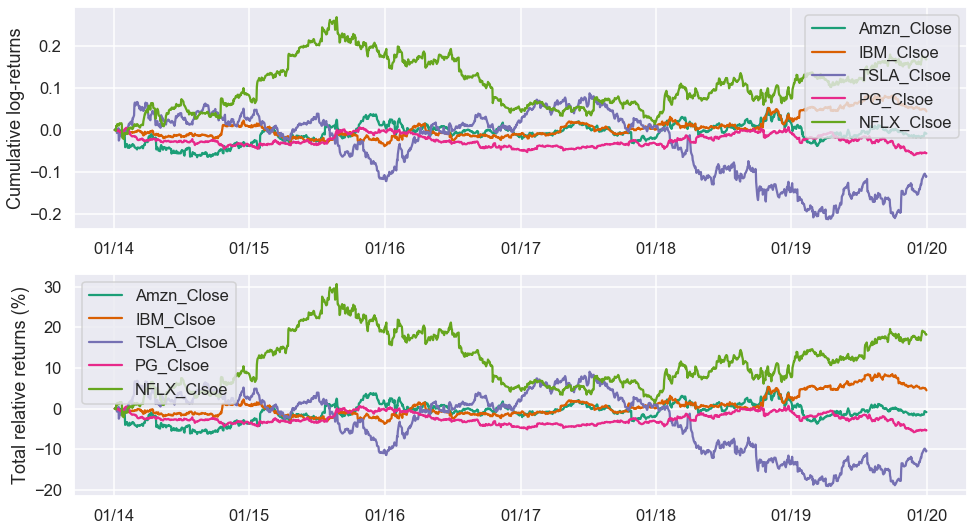

In [33]:
# Get the cumulative log-returns per asset
cum_strategy_asset_log_returns = strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns = np.exp(cum_strategy_asset_log_returns) - 1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

for c in asset_log_returns:
    ax1.plot(cum_strategy_asset_log_returns.index, cum_strategy_asset_log_returns[c], label=str(c))
ax1.set_ylabel('Cumulative log-returns')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

for c in asset_log_returns:
    ax2.plot(cum_strategy_asset_relative_returns.index, 100*cum_strategy_asset_relative_returns[c], label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

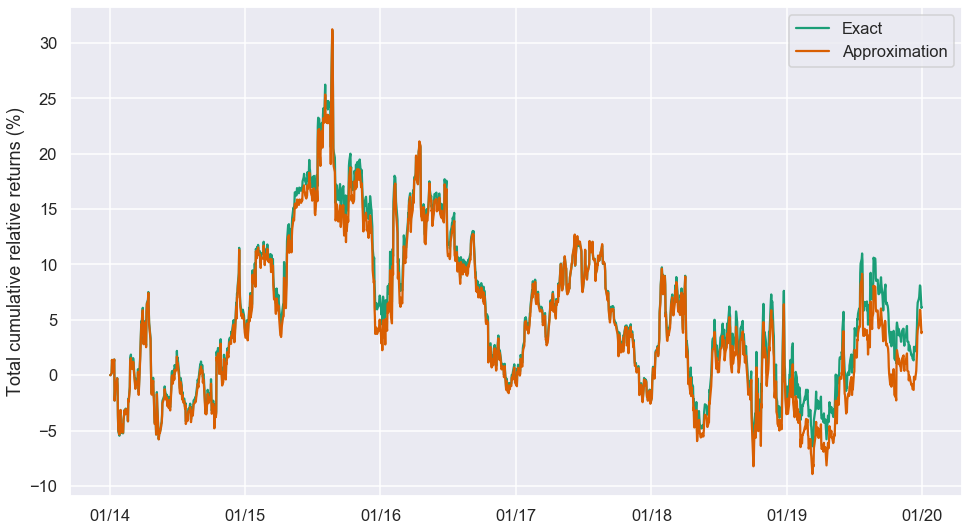

In [34]:
# Total strategy relative returns. This is the exact calculation.
cum_relative_return_exact = cum_strategy_asset_relative_returns.sum(axis=1)

# Get the cumulative log-returns per asset
cum_strategy_log_return = cum_strategy_asset_log_returns.sum(axis=1)

# Transform the cumulative log returns to relative returns. This is the approximation
cum_relative_return_approx = np.exp(cum_strategy_log_return) - 1

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='Exact')
ax.plot(cum_relative_return_approx.index, 100*cum_relative_return_approx, label='Approximation')

ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [35]:
def print_portfolio_yearly_statistics(portfolio_cumulative_relative_returns, days_per_year = 52 * 5):

    total_days_in_simulation = portfolio_cumulative_relative_returns.shape[0]
    number_of_years = total_days_in_simulation / days_per_year

    # The last data point will give us the total portfolio return
    total_portfolio_return = portfolio_cumulative_relative_returns[-1]
    # Average portfolio return assuming compunding of returns
    average_yearly_return = (1 + total_portfolio_return)**(1/number_of_years) - 1

    print('Total portfolio return is: ' + '{:5.2f}'.format(100*total_portfolio_return) + '%')
    print('Average yearly return is: ' + '{:5.2f}'.format(100*average_yearly_return) + '%')

print_portfolio_yearly_statistics(cum_relative_return_exact)

Total portfolio return is:  6.13%
Average yearly return is:  1.03%
